In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle CDC "Rare Diseases" data
#
##########################################################################################

In [18]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_XML_RareDiseases_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub pull request
#
##################################################################################################################


--2019-09-15 12:33:23--  https://data.cdc.gov/api/views/dwqk-w36f/rows.xml
Resolving data.cdc.gov (data.cdc.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cdc.gov (data.cdc.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘rows.xml’

rows.xml                [         <=>        ]   2.29M  1007KB/s    in 2.3s    

2019-09-15 12:33:26 (1007 KB/s) - ‘rows.xml’ saved [2398754]



## Get Data data.gov

Data available at https://data.cdc.gov/api/views/45b4-9j7u/rows.xml



In [2]:
# Download with:
# Info: 
#     https://data.cdc.gov/NNDSS/NNDSS-Table-I-infrequently-reported-notifiable-dis/45b4-9j7u
#


#! wget https://data.cdc.gov/api/views/45b4-9j7u/rows.xml
#! mv rows.xml Data/


In [204]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib notebook

#import xml.etree.ElementTree as ET
from lxml import etree as ET

In [205]:
# Adapted from:  https://python-forum.io/Thread-How-to-display-XML-tree-structure-with-Python

def xml_tree_vis(filename):
    import re, collections
    from lxml import etree as ET

    raw_tree = ET.parse(filename)
    xml_root = raw_tree.getroot()      # the top-most node
    nice_tree = collections.OrderedDict()

    for tag in xml_root.iter():
        path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
        if path not in nice_tree:
            nice_tree[path] = []
        if len(tag.keys()) > 0:
            nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            

    for path, attribs in nice_tree.items():
        indent = int(path.count('/') - 1)
        nodename = path.split('/')[-1]
        if len(attribs) > 0:
            attribslist =  ', '.join(attribs)  
        else:
            attribslist = '-'
            
        print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, nodename, attribslist))
        
# Visualize this file's structure
xml_tree_vis('Data/rows.xml')

0: response [-]
    1: row [-]
        2: row [_id, _uuid, _position, _address]
            3: disease [-]
            3: mmwr_year [-]
            3: mmwr_week [-]
            3: current_week_flag [-]
            3: cum_2017_flag [-]
            3: _5_year_weekly_average_flag [-]
            3: total_cases_reported_2016_flag [-]
            3: total_cases_reported_2015_flag [-]
            3: total_cases_reported_2014_flag [-]
            3: total_cases_reported_2013_flag [-]
            3: total_cases_reported_2012_flag [-]
            3: _5_year_weekly_average [-]
            3: total_cases_reported_2016 [-]
            3: total_cases_reported_2015 [-]
            3: total_cases_reported_2014 [-]
            3: total_cases_reported_2013 [-]
            3: total_cases_reported_2012 [-]
            3: current_week [-]
            3: cum_2017 [-]
            3: states_reporting_cases_during_current_week_no [-]


In [13]:
# Notice there are two levels with the tag "row"  This sort of thing is common in 
# XML and really annoying.  
# This sort of display makes it stand out, though.
# We'll need to remember that for later.

In [206]:

#  Read the entire tree into a collection of "nodes"
#  each of which have several associated attributes,
#  possibly including other "child nodes"
#
#  Web browsers can display XML in a relatively
#  easy-to-read way.  Open rows.xml with your browser.

# Open the file in Python: 
tree = ET.parse('Data/rows.xml')
root = tree.getroot()      # the top-most node


In [223]:
tags=[x for x in root.iter()]
#dir(tags[3])
#dir(tags[2])
#tags[2].attrib['_address']
tags

[<Element response at 0x129a1f3c8>,
 <Element row at 0x12763fdc8>,
 <Element row at 0x1299e5208>,
 <Element disease at 0x1298d12c8>,
 <Element mmwr_year at 0x12998cc48>,
 <Element mmwr_week at 0x12998ce08>,
 <Element current_week_flag at 0x1298f4288>,
 <Element cum_2017_flag at 0x1274f46c8>,
 <Element _5_year_weekly_average_flag at 0x1299e1bc8>,
 <Element total_cases_reported_2016_flag at 0x1299e1f48>,
 <Element total_cases_reported_2015_flag at 0x127620b48>,
 <Element total_cases_reported_2014_flag at 0x12982c548>,
 <Element total_cases_reported_2013_flag at 0x1299f2a88>,
 <Element total_cases_reported_2012_flag at 0x1299f26c8>,
 <Element row at 0x1299f2548>,
 <Element disease at 0x1299f5b88>,
 <Element mmwr_year at 0x1299f5388>,
 <Element mmwr_week at 0x1299f5248>,
 <Element current_week_flag at 0x1299ede08>,
 <Element cum_2017_flag at 0x1299ed908>,
 <Element _5_year_weekly_average at 0x1299ed7c8>,
 <Element total_cases_reported_2016 at 0x1299ed448>,
 <Element total_cases_reported_20

In [22]:
# This data seems to be organized by an attribute called "row", each of 
#  which has several children (probably the columns)

In [19]:
# You can see root's child nodes with

for xx in root.iter():
    print(xx)

# This shows all of the children of root, without regard to their position in the tree.
# In this data set, though, we want to parse each row separately.


<Element response at 0x118b80d08>
<Element row at 0x118c2ff48>
<Element row at 0x108478ac8>
<Element disease at 0x1198fef08>
<Element mmwr_year at 0x118c2ff48>
<Element mmwr_week at 0x108478ac8>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017_flag at 0x1198fef08>
<Element _5_year_weekly_average_flag at 0x108478ac8>
<Element total_cases_reported_2016_flag at 0x118c2ff48>
<Element total_cases_reported_2015_flag at 0x1198fef08>
<Element total_cases_reported_2014_flag at 0x108478ac8>
<Element total_cases_reported_2013_flag at 0x118c2ff48>
<Element total_cases_reported_2012_flag at 0x1198fef08>
<Element row at 0x108478ac8>
<Element disease at 0x118c2ff48>
<Element mmwr_year at 0x1198fef08>
<Element mmwr_week at 0x108478ac8>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017_flag at 0x118c2ff48>
<Element _5_year_weekly_average at 0x108478ac8>
<Element total_cases_reported_2016 at 0x1198fef08>
<Element total_cases_reported_2015 at 0x118c2ff48>
<Element total_cases_repor

<Element total_cases_reported_2012 at 0x118b82888>
<Element row at 0x11a51c148>
<Element disease at 0x108478ac8>
<Element mmwr_year at 0x118b82888>
<Element mmwr_week at 0x11a51c148>
<Element current_week at 0x1198fef08>
<Element cum_2017 at 0x108478ac8>
<Element _5_year_weekly_average at 0x118b82888>
<Element total_cases_reported_2016 at 0x1198fef08>
<Element total_cases_reported_2015 at 0x108478ac8>
<Element total_cases_reported_2014 at 0x118b82888>
<Element total_cases_reported_2013_flag at 0x11a51c148>
<Element total_cases_reported_2012_flag at 0x108478ac8>
<Element states_reporting_cases_during_current_week_no at 0x118b82888>
<Element row at 0x11a51c148>
<Element disease at 0x108478ac8>
<Element mmwr_year at 0x118b82888>
<Element mmwr_week at 0x11a51c148>
<Element current_week_flag at 0x1198fef08>
<Element cum_2017 at 0x108478ac8>
<Element _5_year_weekly_average at 0x11a51c148>
<Element total_cases_reported_2016 at 0x1198fef08>
<Element total_cases_reported_2015 at 0x108478ac8>
<E

<Element current_week_flag at 0x1198fef08>
<Element cum_2017_flag at 0x108478ac8>
<Element _5_year_weekly_average at 0x118c2ff48>
<Element total_cases_reported_2016 at 0x1198fef08>
<Element total_cases_reported_2015 at 0x108478ac8>
<Element total_cases_reported_2014 at 0x118c2ff48>
<Element total_cases_reported_2013 at 0x118b82888>
<Element total_cases_reported_2012 at 0x108478ac8>
<Element row at 0x118c2ff48>
<Element disease at 0x118b82888>
<Element mmwr_year at 0x108478ac8>
<Element mmwr_week at 0x118c2ff48>
<Element current_week at 0x1198fef08>
<Element cum_2017 at 0x118b82888>
<Element _5_year_weekly_average at 0x108478ac8>
<Element total_cases_reported_2016 at 0x1198fef08>
<Element total_cases_reported_2015 at 0x118b82888>
<Element total_cases_reported_2014 at 0x108478ac8>
<Element total_cases_reported_2013 at 0x118c2ff48>
<Element total_cases_reported_2012 at 0x118b82888>
<Element states_reporting_cases_during_current_week_no at 0x108478ac8>
<Element row at 0x118c2ff48>
<Element

<Element mmwr_year at 0x118b82888>
<Element mmwr_week at 0x11a51c148>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017 at 0x108478ac8>
<Element _5_year_weekly_average at 0x11a51c148>
<Element total_cases_reported_2016 at 0x1198fee08>
<Element total_cases_reported_2015 at 0x108478ac8>
<Element total_cases_reported_2014 at 0x11a51c148>
<Element total_cases_reported_2013 at 0x118b82888>
<Element total_cases_reported_2012 at 0x108478ac8>
<Element row at 0x11a51c148>
<Element disease at 0x118b82888>
<Element mmwr_year at 0x108478ac8>
<Element mmwr_week at 0x11a51c148>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017 at 0x118b82888>
<Element _5_year_weekly_average at 0x11a51c148>
<Element total_cases_reported_2016 at 0x1198fee08>
<Element total_cases_reported_2015 at 0x118b82888>
<Element total_cases_reported_2014 at 0x11a51c148>
<Element total_cases_reported_2013_flag at 0x108478ac8>
<Element total_cases_reported_2012_flag at 0x118b82888>
<Element row at 0x11a51c148>

<Element total_cases_reported_2013 at 0x1198fef08>
<Element total_cases_reported_2012 at 0x108478ac8>
<Element row at 0x118c2ff48>
<Element disease at 0x118b82888>
<Element mmwr_year at 0x108478ac8>
<Element mmwr_week at 0x118c2ff48>
<Element current_week_flag at 0x1198fef08>
<Element cum_2017 at 0x118b82888>
<Element _5_year_weekly_average at 0x118c2ff48>
<Element total_cases_reported_2016 at 0x1198fef08>
<Element total_cases_reported_2015 at 0x118b82888>
<Element total_cases_reported_2014 at 0x118c2ff48>
<Element total_cases_reported_2013 at 0x108478ac8>
<Element total_cases_reported_2012 at 0x118b82888>
<Element row at 0x118c2ff48>
<Element disease at 0x108478ac8>
<Element mmwr_year at 0x118b82888>
<Element mmwr_week at 0x118c2ff48>
<Element current_week_flag at 0x1198fef08>
<Element cum_2017_flag at 0x108478ac8>
<Element _5_year_weekly_average_flag at 0x118c2ff48>
<Element total_cases_reported_2016_flag at 0x1198fef08>
<Element total_cases_reported_2015_flag at 0x108478ac8>
<Elemen

<Element mmwr_week at 0x118b82888>
<Element current_week_flag at 0x11a51c148>
<Element cum_2017 at 0x118c2ff48>
<Element _5_year_weekly_average at 0x118b82888>
<Element total_cases_reported_2016 at 0x108478ac8>
<Element total_cases_reported_2015 at 0x118c2ff48>
<Element total_cases_reported_2014 at 0x118b82888>
<Element total_cases_reported_2013 at 0x108478ac8>
<Element total_cases_reported_2012 at 0x118c2ff48>
<Element row at 0x118b82888>
<Element disease at 0x108478ac8>
<Element mmwr_year at 0x118c2ff48>
<Element mmwr_week at 0x118b82888>
<Element current_week_flag at 0x11a51c148>
<Element cum_2017_flag at 0x108478ac8>
<Element _5_year_weekly_average_flag at 0x118b82888>
<Element total_cases_reported_2016_flag at 0x118c2ff48>
<Element total_cases_reported_2015 at 0x108478ac8>
<Element total_cases_reported_2014 at 0x118b82888>
<Element total_cases_reported_2013_flag at 0x118c2ff48>
<Element total_cases_reported_2012_flag at 0x108478ac8>
<Element row at 0x118b82888>
<Element disease at

<Element total_cases_reported_2016 at 0x118c2ff48>
<Element total_cases_reported_2015 at 0x11a51c148>
<Element total_cases_reported_2014 at 0x108478ac8>
<Element total_cases_reported_2013 at 0x118c2ff48>
<Element total_cases_reported_2012 at 0x11a51c148>
<Element row at 0x108478ac8>
<Element disease at 0x118c2ff48>
<Element mmwr_year at 0x11a51c148>
<Element mmwr_week at 0x108478ac8>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017 at 0x118c2ff48>
<Element _5_year_weekly_average at 0x108478ac8>
<Element total_cases_reported_2016 at 0x1198fee08>
<Element total_cases_reported_2015 at 0x118c2ff48>
<Element total_cases_reported_2014 at 0x108478ac8>
<Element total_cases_reported_2013 at 0x11a51c148>
<Element total_cases_reported_2012 at 0x118c2ff48>
<Element row at 0x108478ac8>
<Element disease at 0x11a51c148>
<Element mmwr_year at 0x118c2ff48>
<Element mmwr_week at 0x108478ac8>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017_flag at 0x11a51c148>
<Element _5_year_we

<Element disease at 0x118c2ff48>
<Element mmwr_year at 0x108478ac8>
<Element mmwr_week at 0x118b82888>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017 at 0x118c2ff48>
<Element _5_year_weekly_average at 0x118b82888>
<Element total_cases_reported_2016 at 0x1198fee08>
<Element total_cases_reported_2015 at 0x118c2ff48>
<Element total_cases_reported_2014 at 0x118b82888>
<Element total_cases_reported_2013_flag at 0x108478ac8>
<Element total_cases_reported_2012_flag at 0x118c2ff48>
<Element row at 0x118b82888>
<Element disease at 0x108478ac8>
<Element mmwr_year at 0x118c2ff48>
<Element mmwr_week at 0x118b82888>
<Element current_week at 0x1198fee08>
<Element cum_2017 at 0x108478ac8>
<Element _5_year_weekly_average at 0x118c2ff48>
<Element total_cases_reported_2016 at 0x1198fee08>
<Element total_cases_reported_2015 at 0x108478ac8>
<Element total_cases_reported_2014 at 0x118c2ff48>
<Element total_cases_reported_2013 at 0x118b82888>
<Element total_cases_reported_2012 at 0x108478ac8>


<Element total_cases_reported_2014_flag at 0x118b82888>
<Element total_cases_reported_2013_flag at 0x11a51c148>
<Element total_cases_reported_2012_flag at 0x118c2ff48>
<Element row at 0x118b82888>
<Element disease at 0x11a51c148>
<Element mmwr_year at 0x118c2ff48>
<Element mmwr_week at 0x118b82888>
<Element current_week_flag at 0x1198fef08>
<Element cum_2017_flag at 0x11a51c148>
<Element _5_year_weekly_average_flag at 0x118b82888>
<Element total_cases_reported_2016_flag at 0x1198fef08>
<Element total_cases_reported_2015 at 0x11a51c148>
<Element total_cases_reported_2014_flag at 0x118b82888>
<Element total_cases_reported_2013_flag at 0x118c2ff48>
<Element total_cases_reported_2012 at 0x11a51c148>
<Element row at 0x118b82888>
<Element disease at 0x118c2ff48>
<Element mmwr_year at 0x11a51c148>
<Element mmwr_week at 0x118b82888>
<Element current_week at 0x1198fef08>
<Element cum_2017 at 0x118c2ff48>
<Element _5_year_weekly_average at 0x11a51c148>
<Element total_cases_reported_2016 at 0x119

<Element mmwr_week at 0x11a51c148>
<Element current_week_flag at 0x108478ac8>
<Element cum_2017 at 0x118b82888>
<Element _5_year_weekly_average at 0x11a51c148>
<Element total_cases_reported_2016 at 0x118c2ff48>
<Element total_cases_reported_2015 at 0x118b82888>
<Element total_cases_reported_2014 at 0x11a51c148>
<Element total_cases_reported_2013 at 0x118c2ff48>
<Element total_cases_reported_2012 at 0x118b82888>
<Element row at 0x11a51c148>
<Element disease at 0x118c2ff48>
<Element mmwr_year at 0x118b82888>
<Element mmwr_week at 0x11a51c148>
<Element current_week_flag at 0x108478ac8>
<Element cum_2017 at 0x118c2ff48>
<Element _5_year_weekly_average at 0x11a51c148>
<Element total_cases_reported_2016 at 0x118b82888>
<Element total_cases_reported_2015 at 0x118c2ff48>
<Element total_cases_reported_2014 at 0x11a51c148>
<Element total_cases_reported_2013 at 0x118b82888>
<Element total_cases_reported_2012 at 0x118c2ff48>
<Element row at 0x11a51c148>
<Element disease at 0x118b82888>
<Element mm

<Element mmwr_year at 0x11a51c148>
<Element mmwr_week at 0x108478ac8>
<Element current_week at 0x1198fee08>
<Element cum_2017 at 0x118b82888>
<Element _5_year_weekly_average at 0x11a51c148>
<Element total_cases_reported_2016 at 0x1198fee08>
<Element total_cases_reported_2015 at 0x118b82888>
<Element total_cases_reported_2014 at 0x11a51c148>
<Element total_cases_reported_2013 at 0x108478ac8>
<Element total_cases_reported_2012 at 0x118b82888>
<Element states_reporting_cases_during_current_week_no at 0x11a51c148>
<Element row at 0x108478ac8>
<Element disease at 0x118b82888>
<Element mmwr_year at 0x11a51c148>
<Element mmwr_week at 0x108478ac8>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017 at 0x118b82888>
<Element _5_year_weekly_average at 0x108478ac8>
<Element total_cases_reported_2016 at 0x1198fee08>
<Element total_cases_reported_2015 at 0x118b82888>
<Element total_cases_reported_2014 at 0x108478ac8>
<Element total_cases_reported_2013 at 0x11a51c148>
<Element total_cases_re

<Element states_reporting_cases_during_current_week_no at 0x118b82888>
<Element row at 0x11a51c148>
<Element disease at 0x118c2ff48>
<Element mmwr_year at 0x118b82888>
<Element mmwr_week at 0x11a51c148>
<Element current_week at 0x1198fee08>
<Element cum_2017 at 0x118c2ff48>
<Element _5_year_weekly_average at 0x118b82888>
<Element total_cases_reported_2016 at 0x1198fee08>
<Element total_cases_reported_2015 at 0x118c2ff48>
<Element total_cases_reported_2014 at 0x118b82888>
<Element total_cases_reported_2013 at 0x11a51c148>
<Element total_cases_reported_2012 at 0x118c2ff48>
<Element states_reporting_cases_during_current_week_no at 0x118b82888>
<Element row at 0x11a51c148>
<Element disease at 0x118c2ff48>
<Element mmwr_year at 0x118b82888>
<Element mmwr_week at 0x11a51c148>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017_flag at 0x118c2ff48>
<Element _5_year_weekly_average_flag at 0x11a51c148>
<Element total_cases_reported_2016_flag at 0x1198fee08>
<Element total_cases_reporte

<Element mmwr_year at 0x11a51c148>
<Element mmwr_week at 0x118c2ff48>
<Element current_week_flag at 0x108478ac8>
<Element cum_2017 at 0x118b82888>
<Element _5_year_weekly_average at 0x118c2ff48>
<Element total_cases_reported_2016 at 0x11a51c148>
<Element total_cases_reported_2015 at 0x118b82888>
<Element total_cases_reported_2014 at 0x118c2ff48>
<Element total_cases_reported_2013 at 0x11a51c148>
<Element total_cases_reported_2012 at 0x118b82888>
<Element row at 0x118c2ff48>
<Element disease at 0x11a51c148>
<Element mmwr_year at 0x118b82888>
<Element mmwr_week at 0x118c2ff48>
<Element current_week_flag at 0x108478ac8>
<Element cum_2017_flag at 0x11a51c148>
<Element _5_year_weekly_average_flag at 0x118c2ff48>
<Element total_cases_reported_2016_flag at 0x118b82888>
<Element total_cases_reported_2015_flag at 0x11a51c148>
<Element total_cases_reported_2014_flag at 0x118c2ff48>
<Element total_cases_reported_2013_flag at 0x118b82888>
<Element total_cases_reported_2012_flag at 0x11a51c148>
<El

<Element total_cases_reported_2015_flag at 0x118b82888>
<Element total_cases_reported_2014_flag at 0x11a51c148>
<Element total_cases_reported_2013_flag at 0x108478ac8>
<Element total_cases_reported_2012_flag at 0x118b82888>
<Element row at 0x11a51c148>
<Element disease at 0x108478ac8>
<Element mmwr_year at 0x118b82888>
<Element mmwr_week at 0x11a51c148>
<Element current_week_flag at 0x1198fee08>
<Element cum_2017_flag at 0x108478ac8>
<Element _5_year_weekly_average at 0x11a51c148>
<Element total_cases_reported_2016_flag at 0x1198fee08>
<Element total_cases_reported_2015 at 0x108478ac8>
<Element total_cases_reported_2014_flag at 0x11a51c148>
<Element total_cases_reported_2013_flag at 0x118b82888>
<Element total_cases_reported_2012 at 0x108478ac8>
<Element row at 0x11a51c148>
<Element disease at 0x118b82888>
<Element mmwr_year at 0x108478ac8>
<Element mmwr_week at 0x11a51c148>
<Element current_week at 0x1198fee08>
<Element cum_2017 at 0x118b82888>
<Element _5_year_weekly_average at 0x108

In [20]:
## Here's how you iterate through only the nodes called "row"
for xx in root.iter('row'):
    print(xx)


<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row at 0x1198fe9c8>
<Element row at 0x11a51c148>
<Element row at 0x118b826c8>
<Element row a

<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row at 0x11a5e1bc8>
<Element row at 0x108478ac8>
<Element row at 0x11a51c148>
<Element row a

In [21]:
##################################################################################################################
#
# YouDo:
#
#   You'd like to generate a list of all the diseases on this list.  There are several ways to do this,
#   but unlike the "row" nodes, the data seems to consistently use the element name "disease".
#
#   1) Generate a list of all nodes called "disease" 
#
#######################################  BEGIN STUDENT CODE  #####################################################

diseases = list(root.iter('disease'))

#######################################   END STUDENT CODE   #####################################################


In [22]:
# These nodes have various attributes which you can view like this:
dir(diseases[0])


['__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_init',
 'addnext',
 'addprevious',
 'append',
 'attrib',
 'base',
 'clear',
 'cssselect',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'getnext',
 'getparent',
 'getprevious',
 'getroottree',
 'index',
 'insert',
 'items',
 'iter',
 'iterancestors',
 'iterchildren',
 'iterdescendants',
 'iterfind',
 'itersiblings',
 'itertext',
 'keys',
 'makeelement',
 'nsmap',
 'prefix',
 'remove',
 'replace',
 'set',
 'sourceline',
 'tag',
 'tail',
 'text',
 'values',
 'xpath']

In [23]:
# One of the key attribtues is the "text" attribute which contains the
# disease names we're looking for.
#
diseases[0].text

'Anthrax'

In [24]:


##################################################################################################################
#
# YouDo:
#
# 1) Loop through the list of nodes and extract the text attribute of each node into a list called diz
#    
#   Stretch goal:  do this with a list comprehension
#
# 2) Make a second list called udiz containing only the unique members of this data set 

#######################################  BEGIN STUDENT CODE  #####################################################

# 1)
diz = [xx.text for xx in diseases]

#2)

udiz = list(set(diz))
udiz.sort()
udiz
#######################################   END STUDENT CODE   #####################################################

['Anthrax',
 'Arboviral diseases¶,** Chikungunya virus disease',
 'Arboviral diseases¶,** Chikungunya virus††',
 'Arboviral diseases¶,** Eastern equine encephalitis virus ',
 'Arboviral diseases¶,** Eastern equine encephalitis virus disease',
 'Arboviral diseases¶,** Jamestown Canyon virus disease',
 'Arboviral diseases¶,** Jamestown Canyon virus§§ ',
 'Arboviral diseases¶,** La Crosse virus disease',
 'Arboviral diseases¶,** La Crosse virus§§ ',
 'Arboviral diseases¶,** Powassan virus ',
 'Arboviral diseases¶,** Powassan virus disease',
 'Arboviral diseases¶,** St. Louis encephalitis virus ',
 'Arboviral diseases¶,** St. Louis encephalitis virus disease',
 'Arboviral diseases¶,** Western equine encephalitis virus ',
 'Arboviral diseases¶,** Western equine encephalitis virus disease',
 'Botulism, foodborne',
 'Botulism, infant',
 'Botulism, other (wound and unspecified)',
 'Botulism, total',
 'Brucellosis',
 'Chancroid',
 'Cholera',
 'Cyclosporiasis**',
 'Diphtheria',
 'Haemophilus inf

In [119]:

# This data set uses a column called cum_2017 to report the cumulative number of reports of that disease
# in 2017
##################################################################################################################
#
# YouDo:
# Generate a list of the top 5 most reported of these diseases in 2017 and the number of reports of each
#
# Note: This is a pain without using Pandas.   Give it a go and see how far you get in 30 minutes.
#       After that, feel free to abandon it and use Pandas in the cell below.
#
#######################################  BEGIN STUDENT CODE  #####################################################

reports = dict()

for row in root.iter('disease'):
    parent = row.getparent()
    this_diz = parent.find('disease').text
    this_cum2017 = parent.find('cum_2017')

    if this_cum2017 is None:
        this_count = 0
    else:
        this_count = int(this_cum2017.text)
        
    #reports.append('{}:{}'.format(str(this_count).ljust(5), this_diz))
    if this_diz not in reports.keys():
        reports[this_diz] = this_count
        
    elif this_count > reports[this_diz]:
        reports[this_diz] = this_count
    
def keys_with_max_n_vals(d,n=1):
    """ 
    a) create a list of the dict's keys and values; 
    b) return the key with the max value
    """  
    v=list(d.values())
    k=list(d.keys())
    return [(xx, k[v.index(xx)]) for xx in sorted(v,reverse=True)[:n]]

keys_with_max_n_vals(reports,5)

#######################################   END STUDENT CODE   #####################################################

[(1091, 'Cyclosporiasis**'),
 (731, 'Listeriosis'),
 (589, 'Syphilis, congenital¶¶¶'),
 (444, 'Zika virus disease, non-congenital††††  '),
 (335, 'Typhoid fever (caused by Salmonella typhi)')]

In [139]:
##################################################################################################################
#
# YouDo:  If you abandoned hope above, try reading the reports dictionary into a data frame, try importing
# reports into a data frame and sorting it.

#######################################  BEGIN STUDENT CODE  #####################################################

df = pd.DataFrame([reports.keys(), reports.values()]).T
df.columns=['Disease','Counts']
df.sort_values('Counts',ascending=False,inplace=True)
df.iloc[:5,:]



#######################################   END STUDENT CODE   #####################################################

,Counts
Disease,
Cyclosporiasis**,1091
Listeriosis,731
"Syphilis, congenital¶¶¶",589
"Zika virus disease, non-congenital††††",444
Typhoid fever (caused by Salmonella typhi),335


# The Pandas Way

In [145]:


#import xml.etree.ElementTree as ET
import xmltodict
#import json

tree = ET.parse('Data/rows.xml')
xml_data = tree.getroot()

xmlstr = ET.tostring(xml_data, encoding='ascii', method='xml')


data_dict = dict(xmltodict.parse(xmlstr))

print(data_dict.keys())



dict_keys(['response'])


In [130]:
# Data Dict will reflect the structure 
#  The visualization helps
# Notice that the first of dict_keys is "response"
# which is the same as the "root" of the xml tree
#
xml_tree_vis('Data/rows.xml')


0: response [-]
    1: row [-]
        2: row [_id, _uuid, _position, _address]
            3: disease [-]
            3: mmwr_year [-]
            3: mmwr_week [-]
            3: current_week_flag [-]
            3: cum_2017_flag [-]
            3: _5_year_weekly_average_flag [-]
            3: total_cases_reported_2016_flag [-]
            3: total_cases_reported_2015_flag [-]
            3: total_cases_reported_2014_flag [-]
            3: total_cases_reported_2013_flag [-]
            3: total_cases_reported_2012_flag [-]
            3: _5_year_weekly_average [-]
            3: total_cases_reported_2016 [-]
            3: total_cases_reported_2015 [-]
            3: total_cases_reported_2014 [-]
            3: total_cases_reported_2013 [-]
            3: total_cases_reported_2012 [-]
            3: current_week [-]
            3: cum_2017 [-]
            3: states_reporting_cases_during_current_week_no [-]


In [153]:
# We need to get down to the second level of "row"
#
##################################################################################################################
#
# YouDo: 
# Uncomment the following and look at them in turn
#print(data_dict['response'])
#print(data_dict['response']['row'])
#print(data_dict['response']['row']['row'])

In [147]:
# Once we get to here:
#    data_dict['response']['row']['row']
# We start to get data that looks like actual rows.
# We can make a data frame from this:
df2 = pd.DataFrame(data_dict['response']['row']['row'])

In [148]:
df2

,@_id,@_uuid,@_position,@_address,disease,mmwr_year,mmwr_week,current_week_flag,cum_2017_flag,_5_year_weekly_average_flag,...,total_cases_reported_2012_flag,_5_year_weekly_average,total_cases_reported_2016,total_cases_reported_2015,total_cases_reported_2014,total_cases_reported_2013,total_cases_reported_2012,current_week,cum_2017,states_reporting_cases_during_current_week_no
0,row-skhd-7gcj-bknc,00000000-0000-0000-8068-71B30911A10A,0,https://data.cdc.gov/resource/_45b4-9j7u/row-s...,Anthrax,2017,1,-,-,-,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,row-vyec_dmte-gwmz,00000000-0000-0000-F7D9-05250D543B3D,0,https://data.cdc.gov/resource/_45b4-9j7u/row-v...,"Arboviral diseases¶,** Chikungunya virus disease",2017,1,-,-,NaN,...,NN,6,167,896,NaN,NaN,NaN,NaN,NaN,NaN
2,row-hdxc_43ap~n6yz,00000000-0000-0000-0F1A-DE0D93986652,0,https://data.cdc.gov/resource/_45b4-9j7u/row-h...,"Arboviral diseases¶,** Eastern equine encephal...",2017,1,-,-,NaN,...,NaN,0,6,6,8,8,15,NaN,NaN,NaN
3,row-t9wt_thhz_94py,00000000-0000-0000-E750-7726E41C0121,0,https://data.cdc.gov/resource/_45b4-9j7u/row-t...,"Arboviral diseases¶,** Jamestown Canyon virus ...",2017,1,-,-,-,...,NaN,NaN,4,11,11,22,2,NaN,NaN,NaN
4,row-bkgt~e7aa.8vhi,00000000-0000-0000-84F0-A42719F7BCF1,0,https://data.cdc.gov/resource/_45b4-9j7u/row-b...,"Arboviral diseases¶,** La Crosse virus disease",2017,1,-,-,-,...,NaN,NaN,34,55,80,85,78,NaN,NaN,NaN
5,row-sztx_txbm~vsg3,00000000-0000-0000-0260-B2410C02B184,0,https://data.cdc.gov/resource/_45b4-9j7u/row-s...,"Arboviral diseases¶,** Powassan virus disease",2017,1,-,-,-,...,NaN,NaN,13,7,8,12,7,NaN,NaN,NaN
6,row-6khc.wagz.utpy,00000000-0000-0000-7A43-62A153C6B72D,0,https://data.cdc.gov/resource/_45b4-9j7u/row-6...,"Arboviral diseases¶,** St. Louis encephalitis ...",2017,1,-,-,-,...,NaN,NaN,9,23,10,1,3,NaN,NaN,NaN
7,row-m6tc.gzn9-t86m,00000000-0000-0000-6D21-E71EC58407C8,0,https://data.cdc.gov/resource/_45b4-9j7u/row-m...,"Arboviral diseases¶,** Western equine encephal...",2017,1,-,-,-,...,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,row-jvcs.f8as_zyzq,00000000-0000-0000-44B9-61BBB6C622D9,0,https://data.cdc.gov/resource/_45b4-9j7u/row-j...,"Botulism, total",2017,1,-,-,NaN,...,NaN,3,177,195,161,152,168,NaN,NaN,NaN
9,row-xt2k~2xxr_tuwm,00000000-0000-0000-040A-FF5C29A3DC04,0,https://data.cdc.gov/resource/_45b4-9j7u/row-x...,"Botulism, foodborne",2017,1,-,-,NaN,...,NaN,0,33,37,15,4,27,NaN,NaN,NaN


<IPython.core.display.Javascript object>


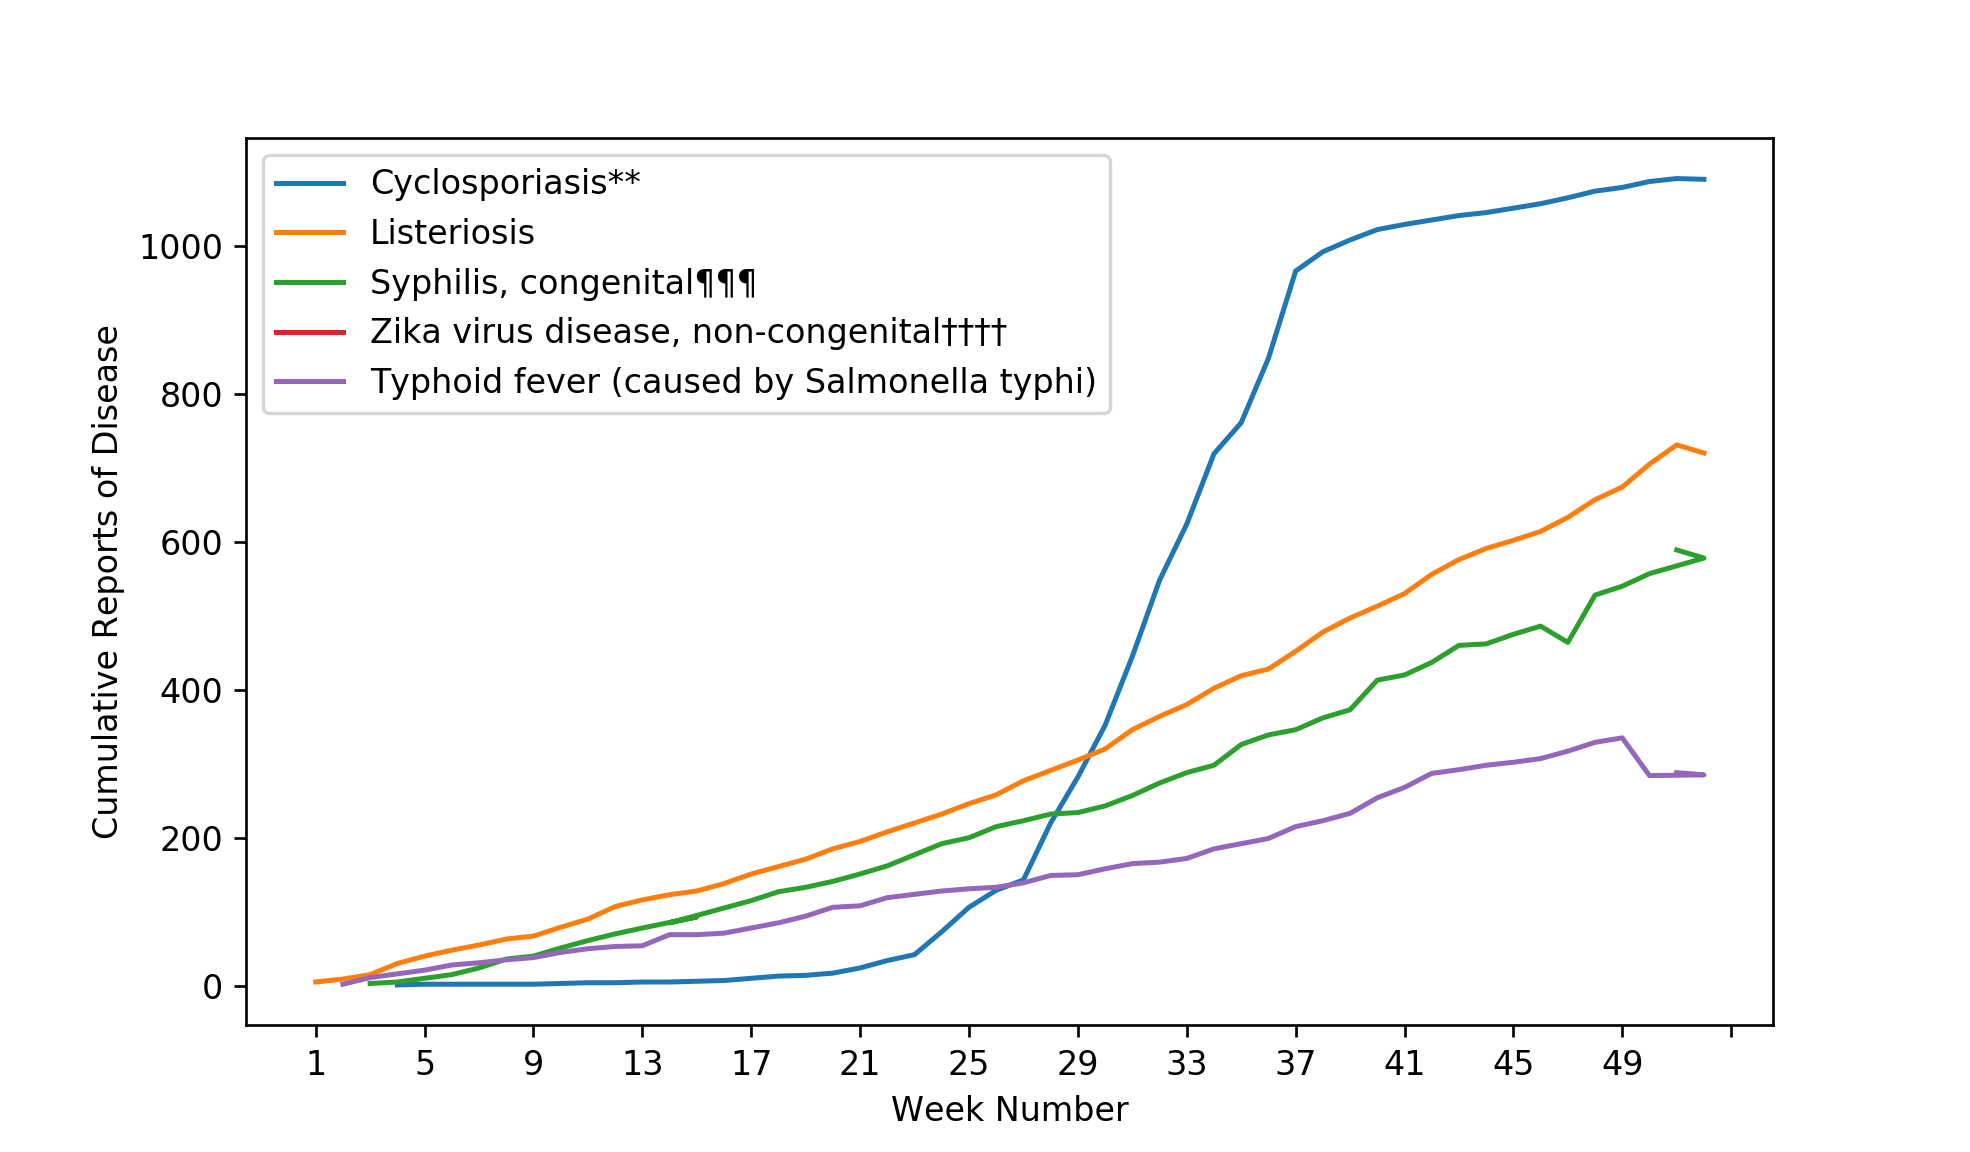

In [203]:
##################################################################################################################
#
# YouDo: 
#  Make a visualization showing week vs cum_2017 for all of the top 5 diseases
#  Ensure it has appropriate labels, etc. for pulblication
#######################################  BEGIN STUDENT CODE  #####################################################

fig, ax  = plt.subplots()

for diz in df.iloc[:5,:].Disease:
    this_diz = df2[[xx.startswith(diz) for xx in df2.disease]]
    this_diz.sort_values('cum_2017')
    plt.plot(this_diz.mmwr_week, [float(xx) for xx in this_diz.cum_2017],label=diz)
plt.legend()
plt.xlabel('Week Number')
plt.ylabel('Cumulative Reports of Disease')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
#######################################   END STUDENT CODE   #####################################################